In [ ]:
# Install FEniCS
try:
    import dolfin
except ImportError:
    !wget "https://fem-on-colab.github.io/releases/fenics-install-real.sh" -O "/tmp/fenics-install.sh" && bash "/tmp/fenics-install.sh"
    import dolfin

<div class="alert alert-warning">
<font size="5"><strong>The equations of linear elasticity</strong></font>
</div>

Linear elasticity is the study of how solid objects deform and become
internally stressed due to prescribed loading conditions. It is an important problem
in modern engineering. Its corresponding PDE is a generalization of the
Poisson equation, and it is among one of the most popular PDEs in
engineering. We now study its variational formulation and how to solve
this problem using FEniCS in 2D and 3D.

We will now briefly review the formulation of the linear elastic assumed stress mixed element. Let $\bar \Omega$ be the closed and bounded domain occupied by a solid body. The interior part of $\bar \Omega$ is denoted $\Omega$ and it’s boundary $\partial \Omega = \Gamma$, i.e. $\Omega = \bar \Omega \cup \partial \Omega$. The boundary consists of that part where surface tractions $\bar t$ are prescribed $(\Gamma_t)$ and a part where displacements $\bar u$ are prescribed $(\Gamma_u)$, with $\Gamma = \Gamma_u \cup \Gamma_t$ . In the domain $\Omega$, the strong form of the linear elastic boundary value problem is given by:

\begin{eqnarray*}
 -\text{ div } \sigma =  \bf {f}&      \text{ in } \Omega,  \tag{1}\\
\sigma = C \varepsilon & \text{ in } \Omega, \tag{2}\\
\varepsilon = \frac{1}{2}\bigg(\nabla u + \nabla^T u \bigg) & \text{ in } \Omega,  \tag{3}
\end{eqnarray*}

and on the boundary $(\Gamma)$

$$
\sigma {\bf n} = {\bf g} \text{ on } \Gamma_t, \tag{4}
$$
$$
{\bf u} =  {\bf u}_0 \text{ on }  \Gamma_u, \tag{5}
$$

where $\bf u$ is the displacement field, $\varepsilon$ is the infinitesimal strain tensor, $\sigma$ is the stress tensor, $\bf f$ is the body force vector, $C$ is the fourth order tensor that contains the elastic constants of the generalized Hooke’s law, $\bf g$ is the prescribed traction on the boundary $\Gamma_t$ with outward unit normal $\bf n$ and ${\bf u}_0$ is the prescribed displacement on the boundary $\Gamma_u$.

<div class="alert alert-info">
<font size="2">
For isotropic materials, the stress tensor is further related to the deformation by
the following two equations:

\begin{align}
{\sigma} &= \lambda \hbox{tr} ({\varepsilon}) {I} + 2\mu {\varepsilon},
\tag{6a}\\
{\sigma}({\bf u}) &= \lambda({\nabla}\cdot {\bf u}){I} + \mu({\nabla} \boldsymbol{\bf u} + ({\nabla} {\bf u})^T).
\tag{6b}
\end{align}

$\lambda$, $\mu$ are the Lamé coefficients describing the mechanical properties of the material, that are related
to the Young’s modulus $E$ and Poisson’s ratio $\nu$ as follows:

$$
 \lambda = \dfrac{E\nu}{(1+\nu)(1-2\nu)}, \quad \mu = \dfrac{E}{2(1+\nu)}.
$$
</font>
</div>

<div class="alert alert-warning">
<font size="5"><strong>Variational formulation</strong></font>
</div>

Let us define the **vector-valued trial and test** spaces $V_{u_0}, V_0 \in \Omega$ as

$$ V_{u_0} := \left\{ {\bf v} \in \bigg(H^1(\Omega)\bigg)^{dim} \text{ s. t. } {\bf v} = {\bf u}_0 \text{ on } \Gamma_u \right\},$$

$$ V_0 := \left\{ {\bf v} \in \bigg(H^1(\Omega)\bigg)^{dim} \text{ s. t. } {\bf v} = {\bf 0} \text{ on } \Gamma_u \right\}.$$

The variational formulation of (1)--(2) consists of forming the inner product of (1) and a *vector* test function ${\bf v}\in V_0$, where $V_0$ is a vector-valued test function space, and integrating over the domain $\Omega$:

\begin{equation} -\int_\Omega ({\nabla}\cdot{\sigma}) \cdot {\bf v}\ \mathrm{d}{x} =
\int_\Omega {\bf f}\cdot {\bf v}\ \mathrm{d}{x},\tag{7}
\end{equation}
where $\mathrm{d}{x}$ denotes the volume measure.

Since ${\nabla}\cdot {\sigma}$ contains second-order derivatives of the
unknown $\bf{u}$, we integrate this term by parts:

\begin{equation}
-\int_\Omega ({\nabla}\cdot{\sigma}) \cdot {\bf v} \ \mathrm{d}{x}
= \int_\Omega {\sigma} : {\nabla} {\bf v} \ \mathrm{d}{x} - \int_{\partial\Omega}
({\sigma}\cdot {\bf n})\cdot {\bf v} \ \mathrm{d}{s},
\label{eq:elast:varform:integbypart}\tag{8}
\end{equation}

where the **$:$** operator is the inner product between tensors (summed
pairwise product of all elements ${\bf A}:{\bf B} = \sum_{i,j=0}^{dim } a_{ij}b_{ij}$), ${\bf n}$ is the outward unit normal
at the boundary, and $\mathrm{d}{s}$ is a measure in surface area.


Finally by recalling that $ {\bf v} = 0 $ on $\Gamma_u$ and that ${\sigma}\cdot \bf{n} = g$ on the remaining part of the boundary $\Gamma_t$.


Substituting (8) into (7), we thus obtain

\begin{equation}
\int_\Omega \sigma : {\nabla} {\bf v} \mathrm{d}{x} =
\int_\Omega {\bf f}\cdot {\bf v} \mathrm{d}{x}
+ \int_{\Gamma_t} {\bf g}\cdot {\bf v} \mathrm{d}{s}.
\tag{9}
\end{equation}

Using that the tensor $ \sigma $ is symmetric, we can prove that: ${\sigma} : {\nabla} {\bf v} = {\sigma} : {\varepsilon(\bf v)}$, this leads to a new variational form:

$$
\int_\Omega {\sigma} : {\varepsilon(\bf v)} \mathrm{d}{x} =
\int_\Omega {\bf f}\cdot {\bf v} \mathrm{d}{x}
+ \int_{\Gamma_t} {g}\cdot {\bf v} \mathrm{d}{s}.
\tag{10}
$$

Inserting the expression (6.b) for
${\sigma}$ gives the variational form with ${\bf u}$ as unknown.

<div class="alert alert-warning">
<font size="5"><strong>Summary of variational form</strong></font>
</div>
In summary, the variational problem is to find ${\bf u}$ in a vector function space $V_{u_0}$ such that

\begin{equation}
a({\bf u},{\bf v}) = L({\bf v})\quad \forall {\bf v} \in V_0,
\end{equation}

where

\begin{align}
a({\bf u},{\bf v}) &= \int_\Omega\sigma({\bf u}) :\varepsilon({\bf v})\ \mathrm{d}{x},\\
L({\bf v}) &= \int_\Omega {\bf f}\cdot {\bf v}\ \mathrm{d}{x} + \int_{\Gamma_t} {\bf g}\cdot {\bf v}\ \mathrm{d}{s},
\end{align}

and

\begin{equation}
{\sigma}({\bf u})= \lambda({\nabla}\cdot {\bf u}){I} + \mu({\nabla} \boldsymbol{\bf u} + ({\nabla} {\bf u})^T).
\end{equation}

## Note on `grad(u)` vs. `nabla_grad(u)`

For scalar functions, $\boldsymbol{\nabla} u$ has a clear meaning as the vector
$$\boldsymbol{\nabla} u =\left(\frac{\partial u}{\partial x}, \frac{\partial u}{\partial y},
\frac{\partial u}{\partial z}\right).$$

However, for a vector-valued function $\boldsymbol{u}$, the meaning is less clear.
Some sources define $\boldsymbol{\nabla}\boldsymbol{u}$ as the matrix with elements
$\partial u_j / \partial x_i$, especially in continuum mechanics.
Some other sources prefer $\partial u_i / \partial x_j$, such as in the
*Jacobian matrix*.

In our notes, $\boldsymbol{\nabla}$ always denotes the matrix
with elements $\partial u_j / \partial x_i$, to be consistent with most PDEs.
The corresponding operator in FEniCS is `nabla_grad(u)`.
For the Jacobian matrix, its corresponding operator in FEniCS is `grad(u)`.

In [ ]:
from dolfin import *
import matplotlib.pyplot as plt
import numpy as np

### Function definition

In [ ]:
# --------------------
# Functions and classes
# --------------------
def left(x, on_boundary):
    return (on_boundary and near(x[0], 0.0))

# Strain function
def epsilon(u):
    return sym(grad(u))

# Stress function
def sigma(u):
    return lambda_*div(u)*Identity(2) + 2*mu*epsilon(u)

### Define the model parameters

In [ ]:
# --------------------
# Parameters
# --------------------

# Young's modulus and Poisson's ratio
E =  210      #210e9
nu = 0.3

# Lame's constants
lambda_ = E*nu/(1+nu)/(1-2*nu)
mu = E/2/(1+nu)

### Generate the mesh

Plotting a RectangleMesh


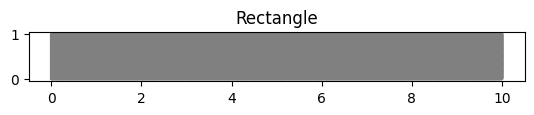

In [ ]:
# --------------------
# Geometry
# --------------------
# mesh = Mesh("external_mesh.xml")

l_x, l_y = 10.0, 1.0  # Domain dimensions

# Discretization : (Nx x Ny) elements
n_x = 500
n_y = int(l_y/l_x*n_x)+1

mesh = RectangleMesh(Point(0.0, 0.0), Point(l_x, l_y), n_x, n_y)
print ("Plotting a RectangleMesh")
plot(mesh, title="Rectangle")

### Generate the function space

In [ ]:
# --------------------
# Function spaces
# --------------------
V = VectorFunctionSpace(mesh, "CG", 1)
u = TrialFunction(V)
v = TestFunction(V)

### Define boundary conditions

In [ ]:
# --------------------
# Boundary conditions
# --------------------
# 1. Define Dirichlet boundary condition
bc = DirichletBC(V, Constant((0.0, 0.0)), left)
#
# 2. Definition of Neumann condition domain
#
boundaries = MeshFunction("size_t", mesh, mesh.topology().dim() - 1)
boundaries.set_all(0)

#   AutoSubDomain: Create SubDomain subclass for given inside() function or lambda function
right = AutoSubDomain(lambda x: near(x[0], l_x))

right.mark(boundaries, 1)

# Define the integration on boundary
ds = Measure("ds", domain=mesh, subdomain_data=boundaries)

### Definition of load

In [ ]:
# Load
# Weight density
rho_g = 1.0e-2
#  Unform vertical loading due to self-weight
f = Constant((0.,-rho_g))
# surface load
g = Constant((0.0, 0.0))

### Define the variational problem

In [ ]:
# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
a = inner(sigma(u), epsilon(v))*dx
l = dot(f, v)*dx + dot(g, v)*ds(1)

### Solve the variational problem

Finally, we can solve the problem.

In [ ]:
u = Function(V, name='Displacement')
# Compute solution
solve(a == l, u, bc,solver_parameters={"linear_solver": "cg","preconditioner":"hypre_amg"})

## Post-processing

### Plot the solution


The solution can be plotted by deforming the mesh.

From the displacements `u`, Stress can be plotted similarly but since it is a second-order tensor we must specify a scalar subspace by two indices. For example stress $σ_{xx}$ is obtained by $sigma(u)[0,0]$.

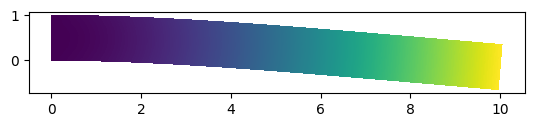

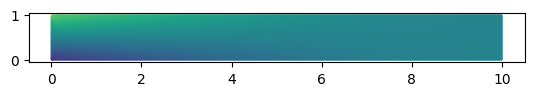

Deflection : 0.653487


In [ ]:
# Plot Deformed Shape
plt.figure()
# scale factor
factor=1
plot(factor*u, mode ="displacement")
# Plot stress σxx
plt.figure()
plot(sigma(u)[0,0], mode='color')
plt.show()

# Beam deflection calculation
w_max = -u(l_x,l_y)[1]

print("Deflection : %g" % w_max)

## 2D Linear Elasticity: Plate with a hole subjected to axial loading

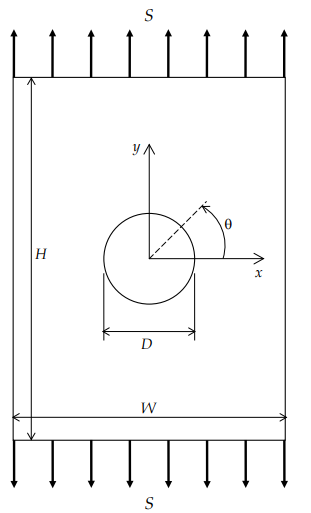


To reduce the size of each finite element model, and hence
reduce the computation times, $¼-$symmetry was utilised when creating a finite element mesh for the 2D problems.

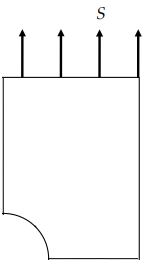

## Problem statement

The corresponding boundary-value problem is:

$$
-\nabla \cdot \sigma = f\hbox{ in }\Omega,
$$
$$
\sigma {\bf n} = {\bf g} \text{ on } \Gamma_{top},
$$

* symmetry boundary conditions

$$
 u_y =  0 \text{ on }  \Gamma_{bottom},
$$
$$
 u_x =  0 \text{ on }  \Gamma_{left}.
$$

* Young's modulus and Poisson's ratio:

$$ E = 200.e6, \quad nu = 0.3.$$

* The load:
  1. $$f = 0$$
  2. $${\bf g} = (0,1000)$$

In [ ]:
from dolfin import *
from mshr import *
%matplotlib inline
L, R = 1., 0.1
N = 40 # mesh density

domain = Rectangle(Point(0.,0.), Point(L, L)) - Circle(Point(0., 0.), R)
mesh = generate_mesh(domain, N)

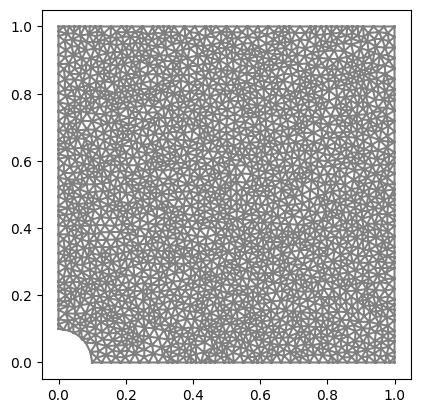

In [ ]:
plot(mesh)

In [ ]:
# --------------------
# Functions and classes
# --------------------
def left(x, on_boundary):
    return (on_boundary and near(x[0], 0.0))

def bottom(x, on_boundary):
    return (on_boundary and near(x[1], 0.0))

# Strain function
def epsilon(u):
    return sym(grad(u))

# Stress function
def sigma(u):
    return lambda_*div(u)*Identity(2) + 2*mu*epsilon(u)

In [ ]:
# --------------------
# Parameters
# --------------------

# Young's modulus and Poisson's ratio
E =  200e6      #210e9
nu = 0.3

# Lame's constants
lambda_ = E*nu/(1+nu)/(1-2*nu)
mu = E/2/(1+nu)

In [ ]:
# --------------------
# Function spaces
# --------------------
V = VectorFunctionSpace(mesh, "CG", 1)
u = TrialFunction(V)
v = TestFunction(V)

In [ ]:
# --------------------
# Boundary conditions
# --------------------
# 1. Define Dirichlet boundary condition
bc1 = DirichletBC(V.sub(0), Constant((0.0)), left)
bc2 = DirichletBC(V.sub(1), Constant((0.0)), bottom)
bc = [bc1, bc2]
#
# 2. Definition of Neumann condition domain
#
boundaries = MeshFunction("size_t", mesh, mesh.topology().dim() - 1)
boundaries.set_all(0)

#   AutoSubDomain: Create SubDomain subclass for given inside() function or lambda function
top = AutoSubDomain(lambda x: near(x[1], L))

top.mark(boundaries, 1)

# Define the integration on boundary
ds = Measure("ds", domain=mesh, subdomain_data=boundaries)

In [ ]:
# Load
# Weight density
rho_g = 0
#  Unform vertical loading due to self-weight
f = Constant((0.,-rho_g))
# surface load
g = Constant((0.0, 1000.0))

In [ ]:
# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
a = inner(sigma(u), epsilon(v))*dx
l = dot(f, v)*dx + dot(g, v)*ds(1)

In [ ]:
u = Function(V, name='Displacement')
# Compute solution
solve(a == l, u, bc,solver_parameters={"linear_solver": "cg","preconditioner":"hypre_amg"})

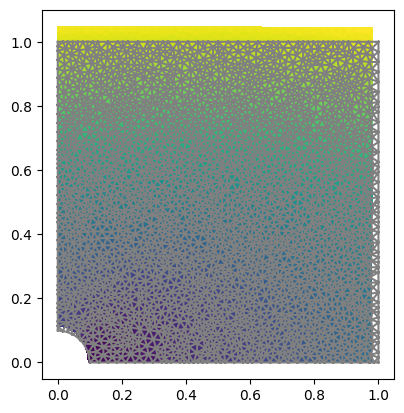

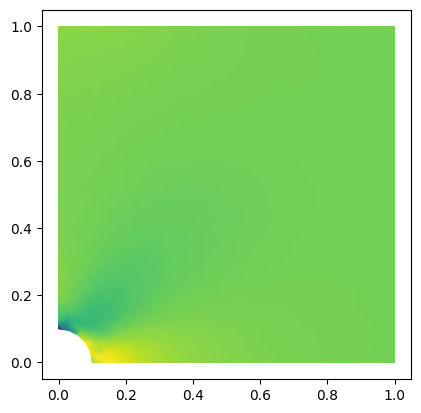

Deflection : -4.40281e-07


In [ ]:
# Plot Deformed Shape
plt.figure()
# scale factor
factor=10000
plot(factor*u, mode ="displacement")
plot(mesh)
# Plot stress σxx
plt.figure()
plot(sigma(u)[0,0], mode='color')
plt.show()

# Beam deflection calculation
w_max = -u(L,R)[1]

print("Deflection : %g" % w_max)

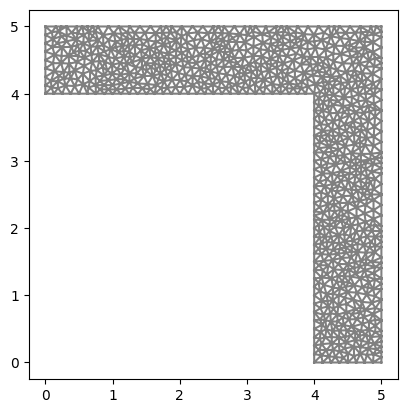

In [ ]:
from dolfin import *
from mshr import *
%matplotlib inline
L_x, L_y = 5., 4.
N = 40 # mesh density

domain = Rectangle(Point(0.,0.), Point(L_x, L_x)) - Rectangle(Point(0., 0.), Point(L_y, L_y))
mesh = generate_mesh(domain, N)

plot(mesh)

In [ ]:
# --------------------
# Functions and classes
# --------------------
def left(x, on_boundary):
    return (on_boundary and near(x[0], 0.0))

def bottom(x, on_boundary):
    return (on_boundary and near(x[1], 0.0))

# Strain function
def epsilon(u):
    return sym(grad(u))

# Stress function
def sigma(u):
    return lambda_*div(u)*Identity(2) + 2*mu*epsilon(u)

In [ ]:
# --------------------
# Parameters
# --------------------

# Young's modulus and Poisson's ratio
E =  200e6      #210e9
nu = 0.3

# Lame's constants
lambda_ = E*nu/(1+nu)/(1-2*nu)
mu = E/2/(1+nu)

In [ ]:
# --------------------
# Function spaces
# --------------------
V = VectorFunctionSpace(mesh, "CG", 1)
u = TrialFunction(V)
v = TestFunction(V)

In [ ]:
# --------------------
# Boundary conditions
# --------------------
# 1. Define Dirichlet boundary condition
bc1 = DirichletBC(V.sub(0), Constant((0.0)), left)
bc2 = DirichletBC(V, Constant((0.0, 0.0)), bottom)
bc = [bc1, bc2]
#
# 2. Definition of Neumann condition domain
#
boundaries = MeshFunction("size_t", mesh, mesh.topology().dim() - 1)
boundaries.set_all(0)

#   AutoSubDomain: Create SubDomain subclass for given inside() function or lambda function
top = AutoSubDomain(lambda x: near(x[1], L_x))

top.mark(boundaries, 1)

# Define the integration on boundary
ds = Measure("ds", domain=mesh, subdomain_data=boundaries)

In [ ]:
# Load
# Weight density
rho_g = 0
#  Unform vertical loading due to self-weight
f = Constant((0.,-rho_g))
# surface load
g = Constant((0.0, -1000.0))

In [ ]:
# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
a = inner(sigma(u), epsilon(v))*dx
l = dot(f, v)*dx + dot(g, v)*ds(1)

In [ ]:
u = Function(V, name='Displacement')
# Compute solution
solve(a == l, u, bc,solver_parameters={"linear_solver": "cg","preconditioner":"hypre_amg"})

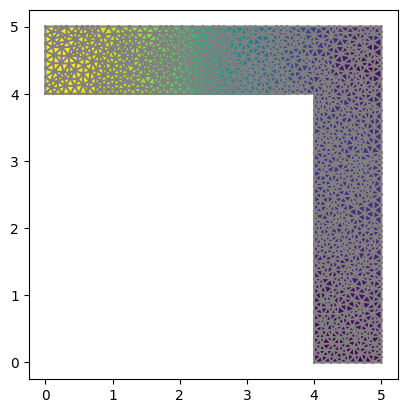

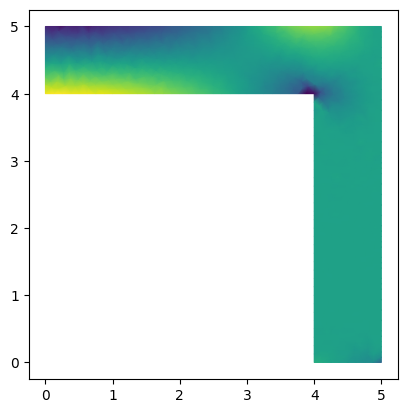

Deflection : -2.53446e-05


In [ ]:
# Plot Deformed Shape
plt.figure()
# scale factor
factor=10
plot(factor*u, mode ="displacement")
plot(mesh)
# Plot stress σxx
plt.figure()
plot(sigma(u)[0,0], mode='color')
plt.show()

# Beam deflection calculation
w_max = -u(L_x,L_y)[1]

print("Deflection : %g" % w_max)